# Atividade Regressão Linear

Daniel Pontes Nery
GU3008347

In [2]:
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [201]:
import petl as etl
import numpy as np

# Extração 
filename = 'penguins.json'
colunas = ["species", "bill_length_mm", "body_mass_g", "sex"]
penguins = penguins.fillna(0) # Retirando NaN
penguins
penguins_array = penguins[colunas].to_numpy()

# Transformação
penguins_array_tratado = []
species = []
for pgn in penguins_array:
    if pgn[-1] == 0.0:
        pgn[-1] = 0

    if pgn[-1] == 'Male':
        pgn[-1] = 1

    if pgn[-1] == 'Female':
        pgn[-1] = 2

    if pgn[0] in species:
        pgn[0] = species.index(pgn[0])

    if pgn[0] not in species:
        species.append(pgn[0])
        pgn[0] = species.index(pgn[0])

    penguins_array_tratado.append(tuple(pgn))

print(penguins_array_tratado)
penguins_np = np.array(penguins_array_tratado, dtype='i4, f4, f4, i4')

penguins_etl = etl.fromarray(penguins_np)
penguins_etl.display(5)
penguins_etl.tocsv(".\\dados\\penguins.csv")


[(0, 39.1, 3750.0, 1), (1, 39.5, 3800.0, 2), (0, 40.3, 3250.0, 2), (0, 0.0, 0.0, 0), (0, 36.7, 3450.0, 2), (0, 39.3, 3650.0, 1), (0, 38.9, 3625.0, 2), (0, 39.2, 4675.0, 1), (0, 34.1, 3475.0, 0), (0, 42.0, 4250.0, 0), (0, 37.8, 3300.0, 0), (0, 37.8, 3700.0, 0), (0, 41.1, 3200.0, 2), (0, 38.6, 3800.0, 1), (0, 34.6, 4400.0, 1), (0, 36.6, 3700.0, 2), (0, 38.7, 3450.0, 2), (0, 42.5, 4500.0, 1), (0, 34.4, 3325.0, 2), (0, 46.0, 4200.0, 1), (0, 37.8, 3400.0, 2), (0, 37.7, 3600.0, 1), (0, 35.9, 3800.0, 2), (0, 38.2, 3950.0, 1), (0, 38.8, 3800.0, 1), (0, 35.3, 3800.0, 2), (0, 40.6, 3550.0, 1), (0, 40.5, 3200.0, 2), (0, 37.9, 3150.0, 2), (0, 40.5, 3950.0, 1), (0, 39.5, 3250.0, 2), (0, 37.2, 3900.0, 1), (0, 39.5, 3300.0, 2), (0, 40.9, 3900.0, 1), (0, 36.4, 3325.0, 2), (0, 39.2, 4150.0, 1), (0, 38.8, 3950.0, 1), (0, 42.2, 3550.0, 2), (0, 37.6, 3300.0, 2), (0, 39.8, 4650.0, 1), (0, 36.5, 3150.0, 2), (0, 40.8, 3900.0, 1), (0, 36.0, 3100.0, 2), (0, 44.1, 4400.0, 1), (0, 37.0, 3000.0, 2), (0, 39.6, 460

f0,f1,f2,f3
0,39.1,3750.0,1
1,39.5,3800.0,2
0,40.3,3250.0,2
0,0.0,0.0,0
0,36.7,3450.0,2


In [202]:
import pandas as pd

df = pd.read_csv(".\\dados\\penguins.csv")
df

,f0,f1,f2,f3
0,0,39.1,3750.0,1
1,1,39.5,3800.0,2
2,0,40.3,3250.0,2
3,0,0.0,0.0,0
4,0,36.7,3450.0,2
...,...,...,...,...
339,4,0.0,0.0,0
340,4,46.8,4850.0,2
341,4,50.4,5750.0,1
342,4,45.2,5200.0,2


In [276]:
df = df.rename(columns={'f0': "species", 'f1': 'bill_length_mm', 'f2': "body_mass_g", 'f3': "sex"})
df = df.drop('sex', axis=1)
df

,species,bill_length_mm,body_mass_g
0,0,39.1,3750.0
1,1,39.5,3800.0
2,0,40.3,3250.0
3,0,0.0,0.0
4,0,36.7,3450.0
...,...,...,...
339,4,0.0,0.0
340,4,46.8,4850.0
341,4,50.4,5750.0
342,4,45.2,5200.0


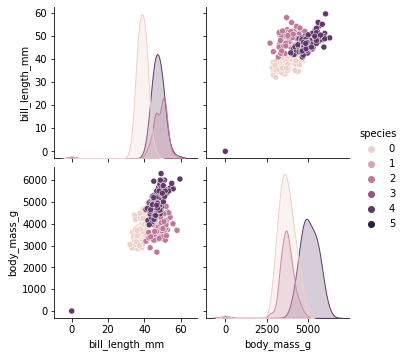

In [277]:
sns.pairplot(df, hue='species')

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [427]:
X = df[["bill_length_mm", "body_mass_g"]].values
y = df["species"].values
print('Rótulos das classes:', np.unique(y))
print('Dados:', X)

Rótulos das classes: [0 1 2 3 4 5]
Dados: [[  39.1 3750. ]
 [  39.5 3800. ]
 [  40.3 3250. ]
 [   0.     0. ]
 [  36.7 3450. ]
 [  39.3 3650. ]
 [  38.9 3625. ]
 [  39.2 4675. ]
 [  34.1 3475. ]
 [  42.  4250. ]
 [  37.8 3300. ]
 [  37.8 3700. ]
 [  41.1 3200. ]
 [  38.6 3800. ]
 [  34.6 4400. ]
 [  36.6 3700. ]
 [  38.7 3450. ]
 [  42.5 4500. ]
 [  34.4 3325. ]
 [  46.  4200. ]
 [  37.8 3400. ]
 [  37.7 3600. ]
 [  35.9 3800. ]
 [  38.2 3950. ]
 [  38.8 3800. ]
 [  35.3 3800. ]
 [  40.6 3550. ]
 [  40.5 3200. ]
 [  37.9 3150. ]
 [  40.5 3950. ]
 [  39.5 3250. ]
 [  37.2 3900. ]
 [  39.5 3300. ]
 [  40.9 3900. ]
 [  36.4 3325. ]
 [  39.2 4150. ]
 [  38.8 3950. ]
 [  42.2 3550. ]
 [  37.6 3300. ]
 [  39.8 4650. ]
 [  36.5 3150. ]
 [  40.8 3900. ]
 [  36.  3100. ]
 [  44.1 4400. ]
 [  37.  3000. ]
 [  39.6 4600. ]
 [  41.1 3425. ]
 [  37.5 2975. ]
 [  36.  3450. ]
 [  42.3 4150. ]
 [  39.6 3500. ]
 [  40.1 4300. ]
 [  35.  3450. ]
 [  42.  4050. ]
 [  34.5 2900. ]
 [  41.4 3700. ]
 [  39

In [428]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1)

# X_train = X_train.reshape(1, -1)
# X_test = X_test.reshape(1, -1)




In [280]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)

StandardScaler()

In [281]:
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [282]:
#X_test_std

array([[-7.05760175e-03,  5.07946805e-01],
       [ 1.04221416e+00,  1.80273617e+00],
       [ 4.42630298e-01,  9.58308323e-01],
       [-8.61464610e-01, -1.20905648e+00],
       [ 1.08718295e+00,  1.57755541e+00],
       [ 1.05720376e+00,  1.40866984e+00],
       [-4.26766308e-01, -1.67595471e-01],
       [-8.46475014e-01, -5.05366609e-01],
       [-6.36620661e-01,  1.13880478e-01],
       [ 5.02588684e-01,  1.12719389e+00],
       [ 1.28204771e+00, -1.11300281e-01],
       [ 9.22297390e-01,  6.76832375e-01],
       [ 9.07307794e-01,  1.85903136e+00],
       [ 1.17712053e+00, -4.49071420e-01],
       [-3.96787114e-01,  1.70175667e-01],
       [-3.51818325e-01, -5.50050916e-02],
       [-1.01136058e+00, -7.86842558e-01],
       [ 6.52484651e-01,  1.69014579e+00],
       [-2.76870341e-01, -2.23890661e-01],
       [-3.21839131e-01, -6.74252178e-01],
       [ 7.87391020e-01,  3.39061236e-01],
       [ 3.22713524e-01, -7.02399773e-01],
       [ 9.52276583e-01,  2.02791693e+00],
       [ 7.

In [429]:
#X_combined_std = np.vstack((X_train_std, X_test_std))
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import matplotlib.pyplot as plt
import matplotlib

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v', '.', '1')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'brown', 'pink')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    print()
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        color=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
            X_test[:, 1],
            c='',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set')

#y_combined_std = np.hstack((y_train, y_test))

In [284]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

In [430]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=21) # Valor mais adequado segundo técnica do cotovelo

In [431]:
KNN.fit(X_train, y_train)
predicao = KNN.predict(X_test)
predicao

array([4, 4, 4, 0, 4, 4, 0, 0, 0, 4, 2, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 0, 0, 4, 4, 4, 2, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 4, 0, 0, 0, 2, 0, 4, 0, 4, 4, 2, 4], dtype=int64)

C:\Users\danie\AppData\Local\Temp\ipykernel_42432\3150507878.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


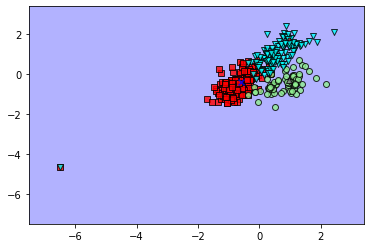

In [432]:
plot_decision_regions(X_combined_std, y_combined_std, classifier=KNN)

In [433]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
print(confusion_matrix(y_test, predicao))


[[44  0  3]
 [13  5  3]
 [ 3  0 33]]


In [434]:
probabilidade = (44 + 5 + 33) / (3 + 5 + 3)
probabilidade

7.454545454545454

In [435]:
print(classification_report(y_test, predicao))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        47
           2       1.00      0.24      0.38        21
           4       0.85      0.92      0.88        36

    accuracy                           0.79       104
   macro avg       0.86      0.70      0.70       104
weighted avg       0.83      0.79      0.75       104



In [423]:
error_rate = []
for i in range(1, 50):
    KNN = KNeighborsClassifier(n_neighbors= i)
    KNN.fit(X_train, y_train)
    preditor_i = KNN.predict(X_test)
    error_rate.append(np.mean(preditor_i != y_test))

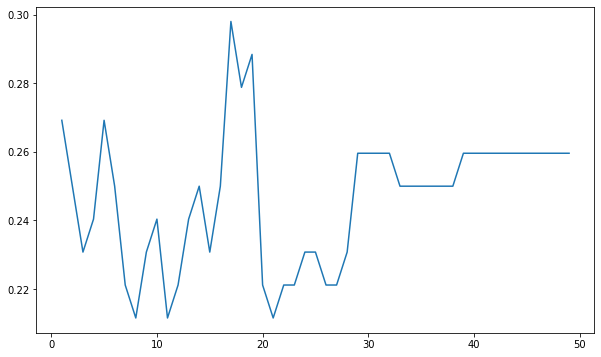

In [424]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 50), error_rate)

In [440]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy do treino : {:.2f}%".format(accuracy) )


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\Users\danie\projects\scripts\linkedin_message_automation\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': 1}
Accuracy do treino : 82.92%


In [461]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        47
           2       0.65      0.62      0.63        21
           3       0.00      0.00      0.00         0
           4       0.75      0.83      0.79        36

    accuracy                           0.73       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.74      0.73      0.73       104



c:\Users\danie\projects\scripts\linkedin_message_automation\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\projects\scripts\linkedin_message_automation\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\projects\scripts\linkedin_message_automation\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [457]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy do teste : {:.2f}%".format(test_accuracy) )

Accuracy do teste : 73.08%
